### Import libraries

In [1]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [2]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


2.13.0


In [3]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler

from Utils import data_visualization
from Utils import data_loader

### Load and process data

In [4]:
!unzip training_dataset.zip

Archive:  training_dataset.zip
  inflating: categories.npy          
  inflating: training_data.npy       
  inflating: valid_periods.npy       


In [4]:
training_data = np.load('training_data.npy')
valid_periods = np.load('valid_periods.npy')
categories = np.load('categories.npy')

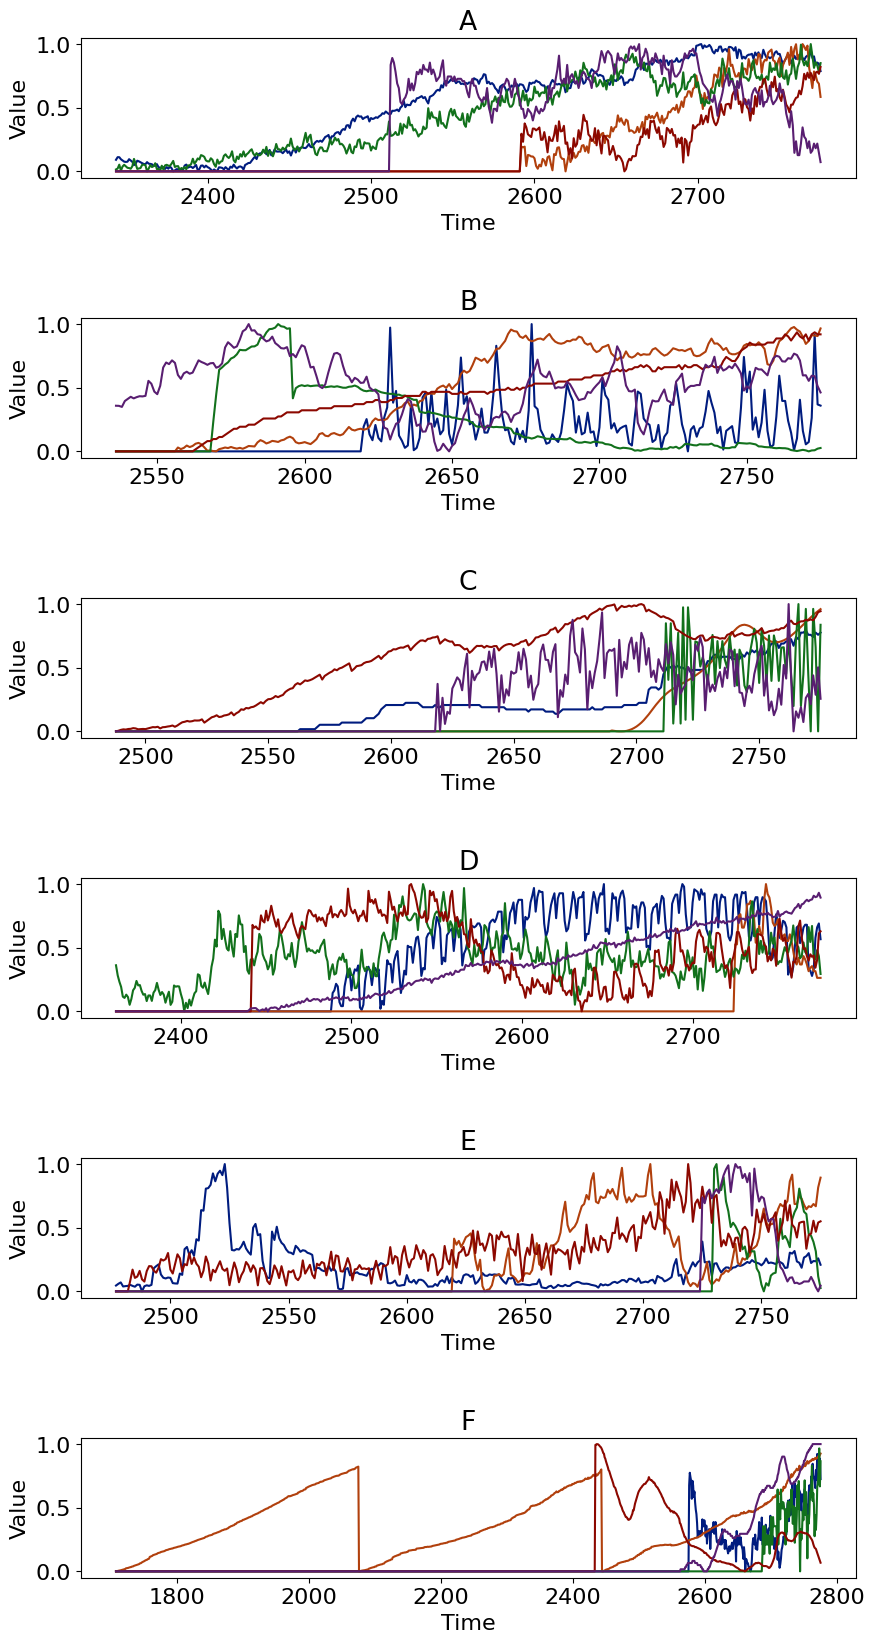

In [5]:
data_visualization.thePlotter(categories, valid_periods, training_data)

In [6]:
data_visualization.the_statistician(valid_periods, categories, less_than=50, higher_than=100)

Total number of samples: 48000
Number of samples of category A: 5728
Number of samples of category B: 10987
Number of samples of category C: 10017
Number of samples of category D: 10016
Number of samples of category E: 10975
Number of samples of category F: 277

Number of samples with less or equal than 50 values: 2504
Number of samples with more or equal than 100 values: 32605
Average number of values: 198.30023
Median number of values: 184.00000


In [8]:
dataset = data_loader.train_valid_test_split(training_data, valid_periods, categories, 0.7, 0.1)
dataset.head()
training_dataset, training_labels, valid_dataset, valid_labels, test_dataset, test_labels = data_loader.THE_SEQUENCER(dataset)

In [9]:
training_dataset[0].shape, valid_dataset.shape, test_dataset.shape

((62, 10), (32512,), (38793,))